<a href="https://colab.research.google.com/github/mrtlckn/IntroToPytorch/blob/main/8%269_EvaluateNewData-SaveandLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

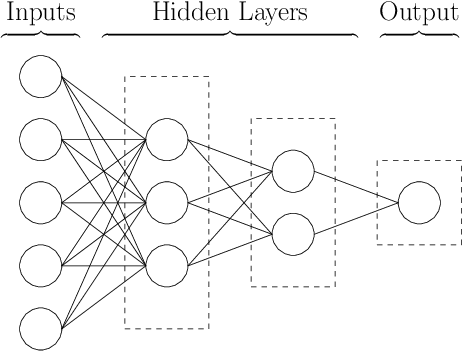

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of the flower) --> Hidden Layer1 (number of neurons) --> H2(n) --> output (3 classes of iris flowers)
  def __init__(self, input_features = 4, h1=8, h2=9, output_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(input_features, h1) # Fully connected layer 1
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
#Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preprocesses

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [7]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [8]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


In [9]:
# Train Test Split! Set x,y

X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [10]:
X.head(1)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2


In [11]:
y.head(1)

0    0.0
Name: variety, dtype: float64

In [12]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [13]:
X[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [14]:
from sklearn.model_selection import train_test_split
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [15]:
# Convert X Features to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Conver y labels to tensors long (64-bit integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
X_test[0:2]

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000]])

In [17]:
y_test[0:2]

tensor([2, 2])

### Set Criterion and Optimizer

In [18]:
# Set the criterion of model to measure the error, how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()

# Chosee Adam Optimizer, lr = learning rate(if error doesn't go down after a bunc of iterations (epocs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [19]:
# Train our model!
# Epochs (one run thru all the training data in out network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forwards and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i}, Loss: {loss}')

  # Do some back propagation : take the error rate of forward propagation and
  # feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 1.125203251838684
Epoch: 10, Loss: 1.0097211599349976
Epoch: 20, Loss: 0.8162347674369812
Epoch: 30, Loss: 0.585993230342865
Epoch: 40, Loss: 0.4003389775753021
Epoch: 50, Loss: 0.26794716715812683
Epoch: 60, Loss: 0.1796349585056305
Epoch: 70, Loss: 0.12165623158216476
Epoch: 80, Loss: 0.0860651507973671
Epoch: 90, Loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

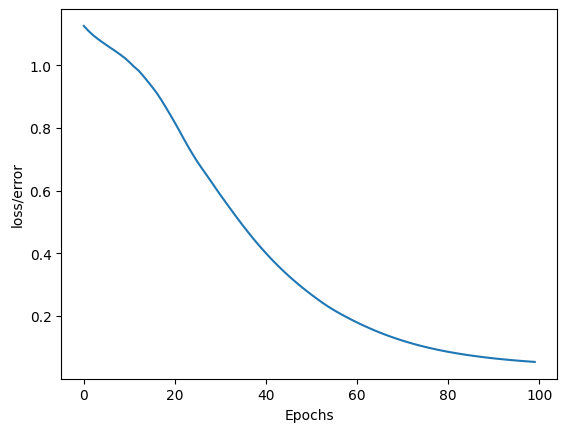

In [20]:
# Graph it out!

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [21]:
# Evaluate Model on Test Data Set (validate model on test data)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error



In [22]:
loss # 0.1315 doesn't look great. This should be closer to 100. epochs.

tensor(0.1315)

In [23]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    # The highest number is what our Network thinks the flower is
    print(f'{i+1}:.) {str(y_val)} \t Actual: {y_test[i]} \t Predicted: {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')

1:.) tensor([-5.8771,  4.4629,  6.5155]) 	 Actual: 2 	 Predicted: 2
2:.) tensor([-7.5451,  4.1668,  9.7293]) 	 Actual: 2 	 Predicted: 2
3:.) tensor([-8.4517,  5.1275, 10.2015]) 	 Actual: 2 	 Predicted: 2
4:.) tensor([-4.3411,  5.6280,  2.5636]) 	 Actual: 1 	 Predicted: 1
5:.) tensor([-7.1838,  4.8757,  8.3023]) 	 Actual: 2 	 Predicted: 2
6:.) tensor([-3.3940,  5.3421,  1.2802]) 	 Actual: 1 	 Predicted: 1
7:.) tensor([-5.9240,  4.9826,  6.0025]) 	 Actual: 2 	 Predicted: 2
8:.) tensor([-4.2895,  5.7016,  2.3920]) 	 Actual: 1 	 Predicted: 1
9:.) tensor([-6.5369,  4.9261,  7.1291]) 	 Actual: 2 	 Predicted: 2
10:.) tensor([-8.0526,  4.4129, 10.3325]) 	 Actual: 2 	 Predicted: 2
11:.) tensor([-5.6775,  4.9505,  5.6248]) 	 Actual: 2 	 Predicted: 2
12:.) tensor([ 4.5748, -2.2579, -2.8925]) 	 Actual: 0 	 Predicted: 0
13:.) tensor([ 4.2646, -2.0055, -2.7342]) 	 Actual: 0 	 Predicted: 0
14:.) tensor([-2.1081,  4.0482,  0.5803]) 	 Actual: 1 	 Predicted: 1
15:.) tensor([ 3.4608, -1.2147, -2.3488]) 	

# 8 - Evaluate New Data On The Network


In [24]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])


In [25]:
with torch.no_grad():
  print(model(new_iris))


tensor([ 4.5445, -2.2478, -2.8698])


In [27]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


# 9 - Save and Load Neural Network Model

In [28]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')


In [29]:
# Load or Saved Model

new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [30]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)